In [1]:
%matplotlib inline

from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt
import numpy

In [2]:
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    return graph

#label = 'kit_fox'

#graph = closure_graph(wn.synset(label + '.n.01'), lambda s: s.hypernyms())
#nx.draw_graphviz(graph, with_labels = True)
#plt.show()
#plt.savefig("plot.png")

def longestPath(G):
    dist = {} # stores [node, distance] pair
    for node in nx.topological_sort(G):
        # pairs of dist,node for all incoming edges
        pairs = [(dist[v][0]+1,v) for v in G.pred[node]] 
        if pairs:
            dist[node] = max(pairs)
        else:
            dist[node] = (0, node)
    node,(length,_)  = max(dist.items(), key=lambda x:x[1])
    path = []
    while length > 0:
        path.append(node)
        length,node = dist[node]
    return list(reversed(path))

In [3]:
f = open('/home/jcmaxwell/ilsrvc2015/imagenet2015_onur/labels.txt', 'r')
labels = f.readlines()

for i in xrange(len(labels)):
    labels[i] = labels[i][:-1]
    
labels = numpy.array(labels)

f.close()

f = open('/home/jcmaxwell/ilsrvc2015/imagenet2015_onur/names.txt', 'r')
names = f.readlines()
f.close()

for i in xrange(len(names)):
    names[i] = names[i][:-1]

In [4]:
print 'Number of labels : ', len(labels)
print 'Number of names  : ', len(names)

Number of labels :  1000
Number of names  :  1000


In [5]:
number_of_syns = []

for i in xrange(len(labels)):
    number_of_syns.append(len(wn.synsets(labels[i])))
    
number_of_syns = numpy.array(number_of_syns)

Maximum number of syns in the labels : 29
Minimum number of syns in the labels : 1


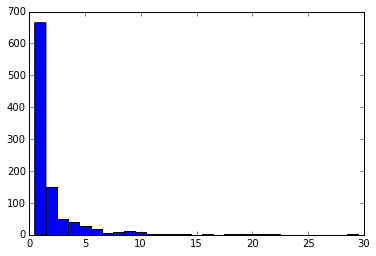

In [6]:
max_number_of_syns = numpy.max(number_of_syns)
min_number_of_syns = numpy.min(number_of_syns)

print 'Maximum number of syns in the labels :', max_number_of_syns
print 'Minimum number of syns in the labels :', min_number_of_syns

plt.hist(number_of_syns, 
         bins = max_number_of_syns - min_number_of_syns + 1, 
         range = (min_number_of_syns, max_number_of_syns + 1), 
         align = 'left')

plt.show()

In [7]:
one_syn_indexes = numpy.where(number_of_syns == 1)[0]
multi_syn_indexes = numpy.where(number_of_syns != 1)[0]

print 'Number of single syns :', len(one_syn_indexes)
print 'Number of multi syns  :', len(multi_syn_indexes)

Number of single syns : 665
Number of multi syns  : 335


In [8]:
multi_syn_labels = ['kit_fox.n.01',
 'badger.n.02',
 'mink.n.03',
 'titi.n.03',
 'sorrel.n.05',
 'dalmatian.n.02',
 'skunk.n.04',
 'weasel.n.02',
 'cardigan.n.02',
 'bighorn.n.02',
 'tiger_cat.n.02',
 'lhasa.n.02',
 'coyote.n.01',
 'newfoundland.n.01',
 'red_fox.n.03',
 'tiger.n.02',
 'ram.n.05',
 'leopard.n.02',
 'cairn.n.02',
 'guinea_pig.n.02',
 'ox.n.01',
 'hare.n.01',
 'boxer.n.04',
 'capuchin.n.02',
 'hog.n.03',
 'basset.n.01',
 'angora.n.03',
 'chow.n.03',
 'chihuahua.n.03',
 'tabby.n.01',
 'samoyed.n.03',
 'polecat.n.02',
 'kelpie.n.02',
 'gibbon.n.02',
 'lion.n.01',
 'beaver.n.07',
 'lynx.n.02',
 'otter.n.02',
 'echidna.n.02',
 'revolver.n.01',
 'umbrella.n.01',
 'schooner.n.02',
 'strawberry.n.01',
 'balloon.n.01',
 'gondola.n.02',
 'canoe.n.01',
 'yawl.n.01',
 'liner.n.04',
 'pirate.n.03',
 'submarine.n.01',
 'wreck.n.04',
 'half_track.n.01',
 'tank.n.01',
 'missile.n.01',
 'bobsled.n.02',
 'dogsled.n.01',
 'barrow.n.03',
 'amphibian.n.01',
 'cab.n.03',
 'convertible.n.01',
 'racer.n.02',
 'moped.n.01',
 'pickup.n.01',
 'snowmobile.n.01',
 'tractor.n.01',
 'unicycle.n.01',
 'bassinet.n.01',
 'cradle.n.01',
 'crib.n.01',
 'file.n.03',
 'throne.n.01',
 'wardrobe.n.01',
 'orange.n.01',
 'lemon.n.01',
 'fig.n.04',
 'pineapple.n.02',
 'banana.n.02',
 'jackfruit.n.02',
 'custard_apple.n.02',
 'pomegranate.n.02',
 'hip.n.05',
 'ear.n.05',
 'corn.n.02',
 'buckeye.n.01',
 'organ.n.05',
 'upright.n.02',
 'chime.n.01',
 'drum.n.01',
 'gong.n.01',
 'harp.n.01',
 'sax.n.02',
 'flute.n.01',
 'volcano.n.02',
 'geyser.n.01',
 'hatchet.n.02',
 'plane.n.05',
 'hammer.n.02',
 'corkscrew.n.01',
 'plunger.n.03',
 'screwdriver.n.01',
 'shovel.n.01',
 'plow.n.01',
 'cock.n.05',
 'hen.n.02',
 'ostrich.n.02',
 'goldfinch.n.02',
 'robin.n.02',
 'jay.n.02',
 'magpie.n.01',
 'kite.n.04',
 'vulture.n.01',
 'peacock.n.02',
 'quail.n.02',
 'partridge.n.03',
 'drake.n.02',
 'goose.n.01',
 'crane.n.05',
 'albatross.n.02',
 'hammerhead.n.03',
 'coho.n.02',
 'eel.n.02',
 'puffer.n.02',
 'gar.n.01',
 'loggerhead.n.02',
 'green_snake.n.02',
 'sidewinder.n.01',
 'spotted_salamander.n.01',
 'tree_frog.n.02',
 'whistle.n.04',
 'wing.n.02',
 'snorkel.n.01',
 'screen.n.03',
 'mouse.n.04',
 'stove.n.02',
 'guillotine.n.02',
 'rule.n.12',
 'scale.n.07',
 'syringe.n.01',
 'projector.n.02',
 'sunglasses.n.01',
 'bow.n.04',
 'cannon.n.02',
 'rifle.n.01',
 'projectile.n.01',
 'crane.n.04',
 'lighter.n.02',
 'abacus.n.02',
 'notebook.n.02',
 'harvester.n.02',
 'thresher.n.01',
 'printer.n.02',
 'slot.n.07',
 'joystick.n.02',
 'switch.n.01',
 'hook.n.04',
 'pinwheel.n.02',
 'carousel.n.02',
 'swing.n.02',
 'reel.n.03',
 'radiator.n.03',
 'puck.n.02',
 'pick.n.05',
 'buckle.n.01',
 'knot.n.02',
 'padlock.n.01',
 'nail.n.02',
 'screw.n.04',
 'muzzle.n.03',
 'ski.n.01',
 'candle.n.01',
 "jack-o'-lantern.n.02",
 'spotlight.n.02',
 'torch.n.01',
 'pier.n.03',
 'mousetrap.n.01',
 'spider_web.n.01',
 'scorpion.n.03',
 'tarantula.n.02',
 'tick.n.02',
 'dungeness_crab.n.02',
 'king_crab.n.03',
 'american_lobster.n.02',
 'spiny_lobster.n.02',
 'crayfish.n.03',
 'fly.n.01',
 'bee.n.01',
 'grasshopper.n.01',
 'cricket.n.01',
 'walking_stick.n.02',
 'admiral.n.02',
 'ringlet.n.04',
 'monarch.n.02',
 'jellyfish.n.02',
 'snail.n.01',
 'slug.n.07',
 'chiton.n.02',
 'iron.n.04',
 'microwave.n.02',
 'dutch_oven.n.01',
 'rotisserie.n.01',
 'toaster.n.02',
 'vacuum.n.04',
 'dishwasher.n.01',
 'washer.n.03',
 'spatula.n.01',
 'altar.n.02',
 'barn.n.01',
 'greenhouse.n.01',
 'palace.n.04',
 'library.n.05',
 'church.n.02',
 'planetarium.n.01',
 'cinema.n.02',
 'coil.n.01',
 'obelisk.n.01',
 'castle.n.02',
 'prison.n.01',
 'confectionery.n.02',
 'fountain.n.01',
 'dock.n.05',
 'brass.n.07',
 'bannister.n.02',
 'dam.n.01',
 'grille.n.02',
 'honeycomb.n.02',
 'pedestal.n.03',
 'beacon.n.03',
 'bell_pepper.n.02',
 'head_cabbage.n.02',
 'broccoli.n.02',
 'cauliflower.n.02',
 'zucchini.n.02',
 'spaghetti_squash.n.02',
 'acorn_squash.n.02',
 'butternut_squash.n.02',
 'cucumber.n.02',
 'artichoke.n.02',
 'cardoon.n.02',
 'mushroom.n.05',
 'jean.n.01',
 'carton.n.02',
 'safe.n.01',
 'plate.n.08',
 'thimble.n.02',
 'pajama.n.02',
 'chest.n.02',
 'tub.n.02',
 'spindle.n.04',
 'mask.n.01',
 'maillot.n.02',
 'teddy.n.01',
 'holster.n.01',
 'trifle.n.01',
 'suit.n.01',
 'cloak.n.01',
 'drumstick.n.02',
 'shield.n.02',
 'menu.n.02',
 'stage.n.03',
 'bonnet.n.01',
 'baseball.n.02',
 'wool.n.01',
 'hay.n.01',
 'mailbag.n.02',
 'bucket.n.01',
 'mortar.n.03',
 'paddle.n.04',
 'chain.n.03',
 'swab.n.02',
 'binder.n.03',
 'cardigan.n.01',
 'pot.n.04',
 'hamper.n.02',
 'apron.n.01',
 'punching_bag.n.02',
 'backpack.n.01',
 'groom.n.01',
 'bearskin.n.02',
 'broom.n.01',
 'mortarboard.n.02',
 'crutch.n.01',
 'cup.n.06',
 'racket.n.04',
 'quill.n.01',
 'radio.n.03',
 'dough.n.01',
 'lipstick.n.01',
 'monitor.n.05',
 'envelope.n.01',
 'perfume.n.02',
 'hotdog.n.02',
 'pillow.n.01',
 'ladle.n.01',
 'lotion.n.01',
 'dome.n.04',
 'crate.n.01',
 'wig.n.01',
 'barrel.n.02',
 'washbasin.n.02',
 'basketball.n.02',
 'gown.n.01',
 'agaric.n.02',
 'nipple.n.02',
 'mailbox.n.01',
 'packet.n.03',
 'maze.n.01',
 'pole.n.01',
 'sombrero.n.02',
 'volleyball.n.02',
 'purse.n.03',
 'bib.n.01',
 'parachute.n.01',
 'television.n.02',
 'wooden_spoon.n.02',
 'goblet.n.01',
 'stretcher.n.03',
 'jersey.n.03',
 'diaper.n.01',
 'band_aid.n.01',
 'velvet.n.01',
 'doormat.n.02',
 'loafer.n.02',
 'quilt.n.01',
 'maillot.n.01',
 'clog.n.01',
 'pitcher.n.02',
 'bikini.n.02',
 'sock.n.01',
 'thatch.n.04',
 'vault.n.03',
 'beaker.n.01',
 'bubble.n.01',
 'flagpole.n.02',
 'stole.n.01',
 'dumbbell.n.01']

In [9]:
graphs_one_syn = []
definitions_one_syn = []
which_synset_one_syn = []

for i in one_syn_indexes:
    graphs_one_syn.append(closure_graph(wn.synsets(labels[i])[0], lambda s: s.hypernyms()))
    definitions_one_syn.append(wn.synsets(labels[i])[0].definition())
    which_synset_one_syn.append(wn.synsets(labels[i])[0].name())
    
graphs_one_syn = numpy.array(graphs_one_syn)
definitions_one_syn = numpy.array(definitions_one_syn)
which_synset_one_syn = numpy.array(which_synset_one_syn)

In [10]:
graphs_multi_syn = []
definitions_multi_syn = []
which_synset_multi_syn = []
        
for i in xrange(len(multi_syn_indexes)):  
    
    #print multi_syn_labels[i]
    #print multi_syn_indexes[i]
    
    #print closure_graph(wn.synset(multi_syn_labels[i]), lambda s: s.hypernyms())
    #print wn.synset(multi_syn_labels[i]).definition()
    #print wn.synset(multi_syn_labels[i]).name()
    
    graphs_multi_syn.append(closure_graph(wn.synset(multi_syn_labels[i]), lambda s: s.hypernyms()))
    definitions_multi_syn.append(wn.synset(multi_syn_labels[i]).definition())
    which_synset_multi_syn.append(wn.synset(multi_syn_labels[i]).name())
            
graphs_multi_syn = numpy.array(graphs_multi_syn)
definitions_multi_syn = numpy.array(definitions_multi_syn)
which_synset_multi_syn = numpy.array(which_synset_multi_syn)

In [11]:
graphs = []
definitions = []
which_synset = []

onek = 0
multik = 0

for i in xrange(len(labels)):
    
    if i in one_syn_indexes:
        graphs.append(graphs_one_syn[onek])
        definitions.append(definitions_one_syn[onek])
        which_synset.append(which_synset_one_syn[onek])
        onek += 1
        
    elif i in multi_syn_indexes:
        graphs.append(graphs_multi_syn[multik])
        definitions.append(definitions_multi_syn[multik])
        which_synset.append(which_synset_multi_syn[multik])
        multik += 1
        
graphs = numpy.array(graphs)
definitions = numpy.array(definitions)
which_synset = numpy.array(which_synset)

In [12]:
selected_synset_no = []

for ws_ in which_synset:
    selected_synset_no.append(int(ws_.split('.')[-1]))
    
selected_synset_no = numpy.array(selected_synset_no)

Max selected synset : 12
Min selected synset : 1


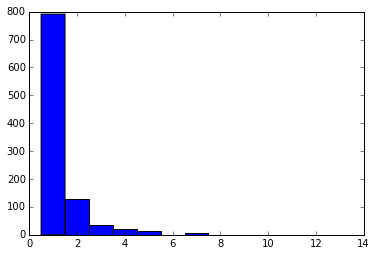

In [13]:
max_selected_synset = numpy.max(selected_synset_no)
min_selected_synset = numpy.min(selected_synset_no)

print 'Max selected synset :', max_selected_synset
print 'Min selected synset :', min_selected_synset

plt.hist(selected_synset_no, 
         bins = max_selected_synset - min_selected_synset + 1, 
         range = (min_selected_synset, max_selected_synset + 1), 
         align = 'left')

plt.show()

In [14]:
any_graph_length_1 = False
any_none_in_graphs = False

for g in graphs:
    if g == None:
        any_none_in_graphs = True
    elif len(g.nodes()) <= 1:
        any_graph_length_1 = True


print 'Any None     :', any_none_in_graphs
print 'Any Length 1 :', any_graph_length_1

Any None     : False
Any Length 1 : False


In [15]:
#for g in graphs:
#    nx.draw_graphviz(g, with_labels = True); plt.show()

#nx.draw_graphviz(graphs[7], with_labels = True); plt.show()

In [16]:
paths = []

for g in graphs:
    #sorted_nodes = nx.topological_sort(g)
    #paths.append(nx.shortest_path(g, source = sorted_nodes[0], target = sorted_nodes[-1]))
    
    paths.append(longestPath(g))

In [17]:
number_of_nodes = []
number_of_edges = []

for p in paths:
    number_of_nodes.append(len(p))
    number_of_edges.append(len(p) - 1)

number_of_nodes = numpy.array(number_of_nodes)
number_of_edges = numpy.array(number_of_edges)

Max number of nodes : 19
Min number of nodes : 5


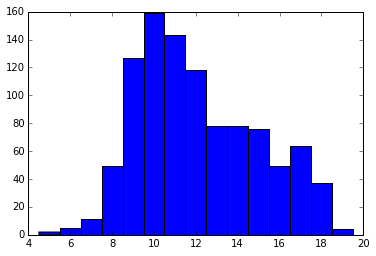

In [18]:
min_number_of_nodes = numpy.min(number_of_nodes)
max_number_of_nodes = numpy.max(number_of_nodes)

print 'Max number of nodes :', max_number_of_nodes
print 'Min number of nodes :', min_number_of_nodes

plt.hist(number_of_nodes, 
         bins = max_number_of_nodes - min_number_of_nodes + 1, 
         range = (min_number_of_nodes, max_number_of_nodes + 1), 
         align = 'left')

plt.show()

In [19]:
node_names = []

for p in paths:
    node_names_g = []
    for i in xrange(len(p)):
        node_names_g.append(p[i].im_self.name().split('.')[0])
        
    node_names_g = numpy.array(node_names_g)
    node_names.append(node_names_g)
    
node_names = numpy.array(node_names)

entity_exists = []
physical_entity_exists = []

for i in xrange(len(node_names)):
    entity_exists.append(any(node_names[i] == u'entity'))
    physical_entity_exists.append(any(node_names[i] == u'physical_entity'))
    
entity_exists = numpy.array(entity_exists)
physical_entity_exists = numpy.array(physical_entity_exists)

for i in numpy.where(physical_entity_exists == False)[0]:
    print labels[i]
    print node_names[i]
    print '\n'

print 'Entity does not exists in nodes          :', numpy.where(entity_exists == False)[0]
print 'Physical Entity does not exists in nodes :', numpy.where(physical_entity_exists == False)[0]

with open("wordnet-imagenet.csv", "w") as f:
    for i, (label, synset) in enumerate(zip(labels, which_synset)):
        f.write(str(label) + ",")
        if synset in which_synset:
            for node in node_names[i][::-1]:
                f.write(str(node).split(".")[0])
                if node != node_names[i][::-1][-1]:
                    f.write(",")
                else:
                    f.write("\n")
        else:
            f.write("\n")

In [20]:
constructed_labels = numpy.loadtxt('./csv/longest_path/constructed_labels.csv', dtype = 'str', delimiter=',')

In [21]:
level1_labels = list(set(constructed_labels[:, 2]))
level2_labels = list(set(constructed_labels[:, 3]))

print len(level1_labels)
print len(level2_labels)

69
333


In [22]:
level1_indexes = []

for l in level1_labels:
    level1_indexes.append(set(([i for i in xrange(len(labels)) if any(node_names[i] == l)])))
    
level2_indexes = []

for l in level2_labels:
    level2_indexes.append(set(([i for i in xrange(len(labels)) if any(node_names[i] == l)])))

In [23]:
print '--------------------'

for i in xrange(len(level1_indexes)):
    for k in xrange(i + 1, len(level1_indexes)):
#        print level1_indexes[i], level1_indexes[k]
        
        if len(level1_indexes[i].intersection(level1_indexes[k])) != 0:
            print level1_labels[i], ':', level1_labels[k]
            print level1_indexes[i].intersection(level1_indexes[k])
        
print '---'        
        
for i in xrange(len(level1_indexes)):
    if len(level1_indexes[i]) == 0:
        print level1[i]
        
print '--------------------'        
        
for i in xrange(len(level2_indexes)):
    for k in xrange(i + 1, len(level2_indexes)):
#        print level2_indexes[i], level2_indexes[k]
        
        if len(level2_indexes[i].intersection(level2_indexes[k])) != 0:
            print level2_labels[i], ':', level2_labels[k]
            print level2_indexes[i].intersection(level2_indexes[k])

print '---'            
            
        
for i in xrange(len(level2_indexes)):
    if len(level2_indexes[i]) == 0:
        print level2[i]

--------------------
---
--------------------
---


In [24]:
coverage_level1 = level1_indexes[0]
coverage_level2 = level2_indexes[0]

for i in xrange(len(level1_indexes) - 1):
    coverage_level1 = coverage_level1.union(level1_indexes[i + 1])

for i in xrange(len(level2_indexes) - 1):
    coverage_level2 = coverage_level2.union(level2_indexes[i + 1])

In [25]:
print set(range(1000)) - coverage_level1
print set(range(1000)) - coverage_level2

set([])
set([])
